In [2]:
import pandas as pd
import numpy as np

In [3]:
!dir()

 Volume in drive F has no label.
 Volume Serial Number is 8AD7-0A22

 Directory of f:\Data Science Project\skripsi with machine learning



File Not Found


In [4]:
skripsi_data=pd.read_csv('olahdata.csv')
skpd=skripsi_data

In [5]:
skpd.head()

,PE,VB,SI,IFL,BI
0,26,28,30,28.0,30.0
1,30,27,26,30.0,30.0
2,24,21,20,20.0,23.0
3,27,29,27,26.0,22.0
4,30,30,30,29.0,29.0


In [6]:
df=skpd

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

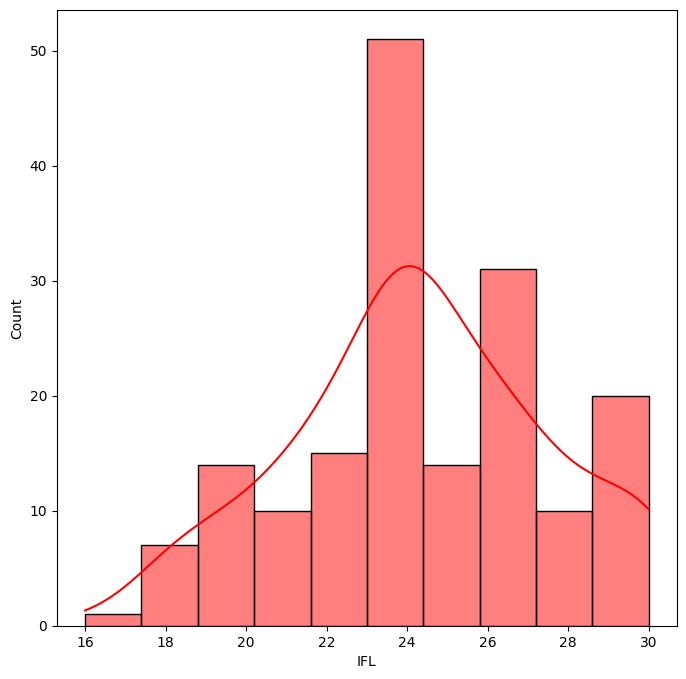

In [8]:
# analysis distribution of data 

fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(df['IFL'], kde=True, color='red', ax=ax)
plt.show()


In [9]:
import pandas as pd
import numpy as np

# Membaca data dari file CSV
df = pd.read_csv('olahdata.csv')

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Mendeteksi outlier untuk setiap kolom
outliers = df.apply(detect_outliers)

print("Outliers detected:")
print(outliers)

Outliers detected:
Empty DataFrame
Columns: [PE, VB, SI, IFL, BI]
Index: []


In [13]:
df.isnull().sum()

PE     0
VB     0
SI     0
IFL    0
BI     0
dtype: int64

In [11]:
# replace missing value with median
df['BI'].fillna(df['BI'].mean(), inplace=True)

C:\Users\AXIOO\AppData\Local\Temp\ipykernel_12572\906915760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BI'].fillna(df['BI'].mean(), inplace=True)


In [12]:
df['IFL'].fillna(df['IFL'].mean(), inplace=True)

C:\Users\AXIOO\AppData\Local\Temp\ipykernel_12572\3148201236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IFL'].fillna(df['IFL'].mean(), inplace=True)


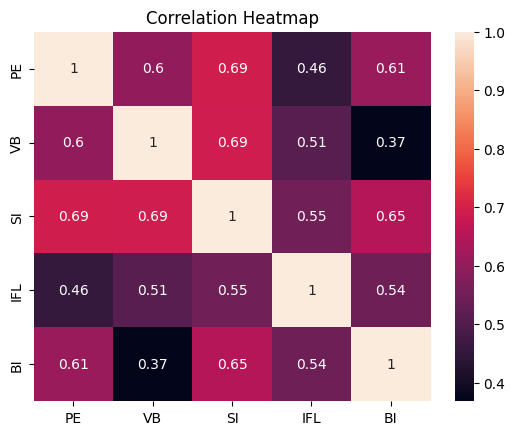

In [14]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True)  # Add annotation for values inside squares
plt.title("Correlation Heatmap")
plt.show()

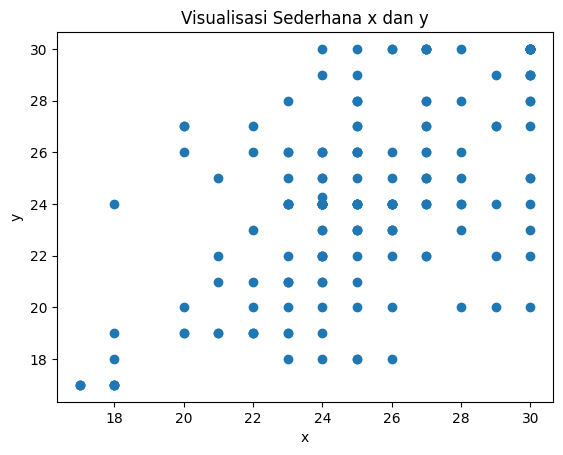

In [15]:
import matplotlib.pyplot as plt

x = df['PE']
y = df['BI']

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualisasi Sederhana x dan y')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV



In [17]:
# Model-model untuk masalah regresi
regression_models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    SVR(kernel='linear'),
    RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=100)
]


In [18]:
x=df.drop(['BI'], axis=1)
y=df['BI']

In [51]:
x.isnull().sum()

PE     0
VB     0
SI     0
IFL    7
dtype: int64

In [1]:
df['IFL'].fillna(df['IFL'].mean(), inplace=True)

NameError: name 'df' is not defined

In [31]:
y

0      30.0
1      30.0
2      23.0
3      22.0
4      29.0
       ... 
175    27.0
176    24.0
177    26.0
178    29.0
179    25.0
Name: BI, Length: 180, dtype: float64

# mencari model terbaik di regresi

In [19]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size = 0.2, random_state=42)
df = pd.DataFrame(skpd)
#Comparing the performance of the models

 # List of Models
models=[LinearRegression(),Ridge(alpha=1.0),Lasso(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5), SVR(kernel='linear'), RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(n_estimators=100)]

def compare_model_train_test(x, y):
    results = []
    for model in models:
        # Membagi data dalam loop agar setiap model mendapat data yang sama
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
        
        model.fit(X_train, y_train)
        test_data_prediction = model.predict(X_test)
        
        mse = mean_squared_error(y_test, test_data_prediction)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, test_data_prediction)
        r2 = r2_score(y_test, test_data_prediction)

        results.append({
            'model': model.__class__.__name__,
            'mean_squared_error': mse,
            'root_mean_squared_error': rmse,
            'mean_absolute_error': mae,
            'r2_score': r2
        })

        print(f'Model: {model.__class__.__name__}')
        print(f'Mean Squared Error: {mse}')
        print(f'Root Mean Squared Error: {rmse}')
        print(f'Mean Absolute Error: {mae}')
        print(f'R² Score: {r2}\n')

    return results

# Membandingkan kinerja model
results = compare_model_train_test(x, y)

# Menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df)    

Model: LinearRegression
Mean Squared Error: 6.4033083945972935
Root Mean Squared Error: 2.530475922548423
Mean Absolute Error: 1.8811267673084235
R² Score: 0.510112887874965

Model: Ridge
Mean Squared Error: 6.4042549185823185
Root Mean Squared Error: 2.530662940532049
Mean Absolute Error: 1.8814986262145181
R² Score: 0.5100404737613526

Model: Lasso
Mean Squared Error: 6.451100752763392
Root Mean Squared Error: 2.539901721083592
Mean Absolute Error: 1.9010838149767564
R² Score: 0.5064565185607226

Model: ElasticNet
Mean Squared Error: 6.433450732138031
Root Mean Squared Error: 2.5364247933140125
Mean Absolute Error: 1.8947557395677335
R² Score: 0.5078068389108095

Model: SVR
Mean Squared Error: 6.686969172782864
Root Mean Squared Error: 2.5859174721523623
Mean Absolute Error: 1.945309228281731
R² Score: 0.48841133129122827

Model: RandomForestRegressor
Mean Squared Error: 7.643089595570375
Root Mean Squared Error: 2.764613823949084
Mean Absolute Error: 2.0702379634556087
R² Score: 0.4

In [39]:
results_df.head(7)

,model,mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score
0,LinearRegression,6.403308,2.530476,1.881127,0.510113
1,Ridge,6.404255,2.530663,1.881499,0.510040
2,Lasso,6.451101,2.539902,1.901084,0.506457
3,ElasticNet,6.433451,2.536425,1.894756,0.507807
4,SVR,6.686969,2.585917,1.945309,0.488411
5,RandomForestRegressor,7.571726,2.751677,2.080384,0.420723
6,GradientBoostingRegressor,6.797638,2.607228,1.982115,0.479945


# untuk mencari best parameter yang ada di regresi menggunakan 7 model


In [20]:
# Parameter untuk Grid Search
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
elasticnet_params = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
svr_params = {'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 1.0]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}



# Model-model untuk Grid Search
models_and_params = {
    'Ridge': (Ridge(), ridge_params),
    'Lasso': (Lasso(), lasso_params),
    'ElasticNet': (ElasticNet(), elasticnet_params),
    'SVR': (SVR(), svr_params),
    'RandomForest': (RandomForestRegressor(), rf_params),
    'GradientBoosting': (GradientBoostingRegressor(), gb_params)
}

# Fungsi untuk Grid Search
def perform_grid_search(X_train, Y_train):
    results = []
    for model_name, (model, params) in models_and_params.items():
        grid_search = GridSearchCV(model, params, cv=20, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, Y_train)
        best_model = grid_search.best_estimator_

        # Evaluasi model terbaik
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
        test_data_prediction = best_model.predict(X_test)
        
        mse = mean_squared_error(y_test, test_data_prediction)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, test_data_prediction)
        r2 = r2_score(y_test, test_data_prediction)

        results.append({
            'model': model_name,
            'best_params': grid_search.best_params_,
            'mean_squared_error': mse,
            'root_mean_squared_error': rmse,
            'mean_absolute_error': mae,
            'r2_score': r2
        })

    return results

# Melakukan Grid Search
results = perform_grid_search(X_train, Y_train)

# Menampilkan hasil
results_df_hyperparamter = pd.DataFrame(results)
print(results_df_hyperparamter)

              model                                  best_params  \
0             Ridge                              {'alpha': 10.0}   
1             Lasso                              {'alpha': 10.0}   
2        ElasticNet              {'alpha': 1.0, 'l1_ratio': 0.1}   
3               SVR                   {'C': 0.1, 'epsilon': 0.1}   
4      RandomForest       {'max_depth': 10, 'n_estimators': 100}   
5  GradientBoosting  {'learning_rate': 0.01, 'n_estimators': 50}   

   mean_squared_error  root_mean_squared_error  mean_absolute_error  r2_score  
0            6.361179                 2.522138             1.911307  0.513336  
1           13.110830                 3.620888             2.864881 -0.003048  
2           10.870011                 3.296970             2.626649  0.168386  
3           12.822017                 3.580784             2.818340  0.019048  
4           12.943505                 3.597708             2.888399  0.009753  
5           12.494645                 3.534

In [21]:
results_df_hyperparamter.head(7)

,model,best_params,mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score
0,Ridge,{'alpha': 10.0},6.361179,2.522138,1.911307,0.513336
1,Lasso,{'alpha': 10.0},13.110830,3.620888,2.864881,-0.003048
2,ElasticNet,"{'alpha': 1.0, 'l1_ratio': 0.1}",10.870011,3.296970,2.626649,0.168386
3,SVR,"{'C': 0.1, 'epsilon': 0.1}",12.822017,3.580784,2.818340,0.019048
4,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",12.943505,3.597708,2.888399,0.009753
5,GradientBoosting,"{'learning_rate': 0.01, 'n_estimators': 50}",12.494645,3.534777,2.792626,0.044093


# memilih model dan parameter terbaik

In [22]:
# Buat model dengan parameter alpha terbaik
model = Ridge(alpha=10.0)
model.fit(x,y)

Ridge(alpha=10.0)

In [23]:
# prediksi dengan data latih
# Prediksi dengan data latih
y_train_pred = model.predict(X_train)

# Hitung metrik evaluasi untuk data latih
mse_train = mean_squared_error(Y_train, y_train_pred)
r2_train = r2_score(Y_train, y_train_pred)

print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

Mean Squared Error: 6.607112867745231
R-squared: 0.5237894508599985


In [24]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.151518708912877
R-squared: 0.7198457886857061


In [26]:
y_pred

array([25.58999713, 28.63501404, 21.35845723, 23.7329258 , 22.89275723,
       23.04471867, 21.96131476, 29.5576721 , 29.35697898, 22.46038571,
       22.99492294, 25.05335488, 18.84900359, 25.35288436, 24.95415997,
       22.94532548, 22.89830227, 20.88986434, 23.59913039, 27.1597634 ,
       27.17983618, 23.99880816, 20.41735843, 25.20349717, 24.31630539,
       24.25313358, 29.02036235, 23.96813182, 27.24930812, 25.35938278,
       26.14250211, 25.12417675, 20.84856715, 26.22927431, 24.36982701,
       25.91102198])

In [25]:
Y_test

19     25.0
42     29.0
153    23.0
78     25.0
145    25.0
15     26.0
24     21.0
68     30.0
113    30.0
118    21.0
93     19.0
159    24.0
69     19.0
142    23.0
45     25.0
16     24.0
51     24.0
125    20.0
96     24.0
56     25.0
97     28.0
120    21.0
143    17.0
30     28.0
9      27.0
172    23.0
60     30.0
18     26.0
148    30.0
173    25.0
109    25.0
55     24.0
140    19.0
126    26.0
66     24.0
29     28.0
Name: BI, dtype: float64

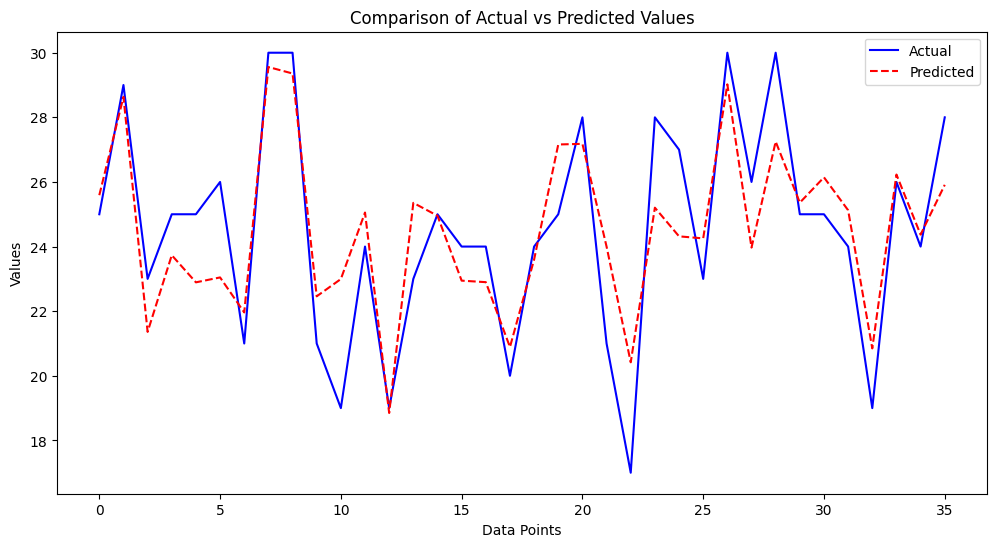

In [27]:
# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()

The blue line represents the actual values, while the red dashed line represents the predicted values. This allows you to see how closely the predictions align with the actual data.

The Mean Squared Error is 3.2113, and the R-squared score is 0.7145, indicating that the model explains about 71.45% of the variance in the target variable.

In [28]:
df.to_csv('olahdata.csv',index=False)

In [32]:
# Mendapatkan koefisien sebagai pengganti feature importance
feature_importances = abs(model.coef_)
print(feature_importances)

[0.38534831 0.30210373 0.4847415  0.33555258]


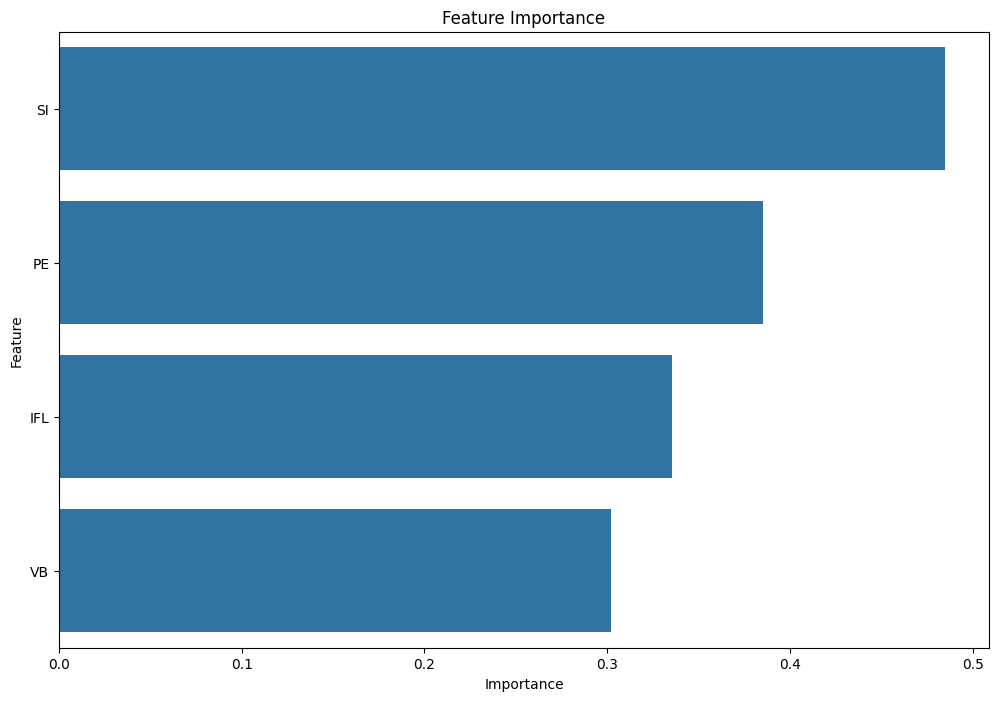

In [31]:
# Membuat DataFrame untuk visualisasi
features = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)

# Visualisasi pentingnya fitur
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance')
plt.show()